In [10]:
with open(r"data\BTC-2017min.csv", "r") as plik:
    x = plik.readlines()[:1000]
    plik2 = open("data\BTC-2017small.csv", "w")
    for line in x:
        plik2.write(line)
    
    plik2.close()

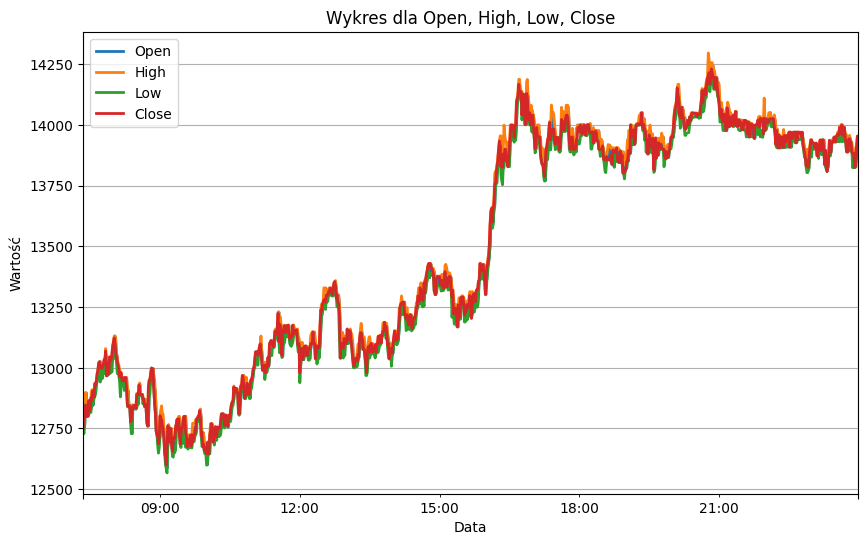

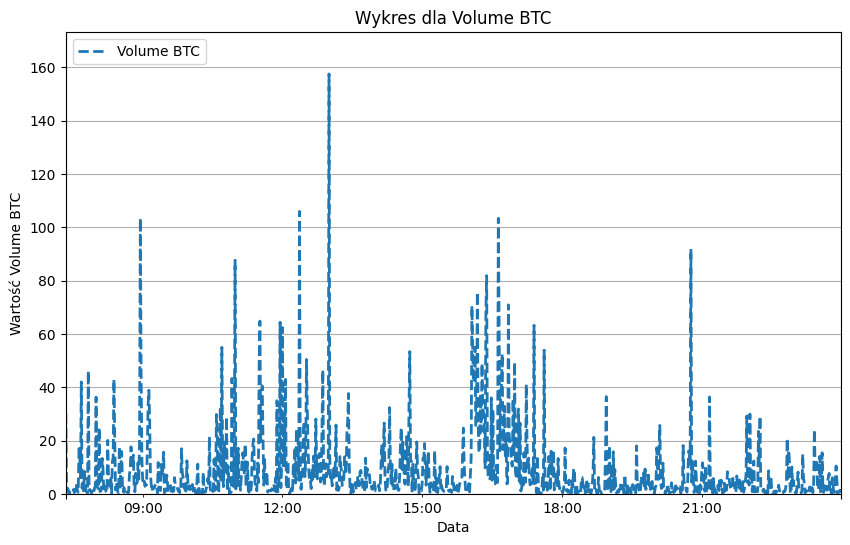

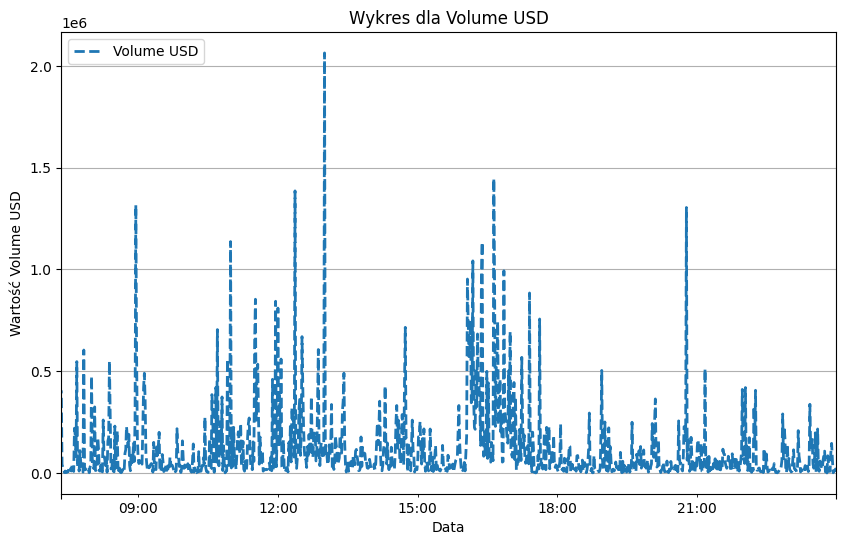

In [16]:
# wizualizowanie
import pandas as pd
import matplotlib.pyplot as plt

# Wczytaj plik CSV
file_path = r'data\BTC-2017small.csv'
df = pd.read_csv(file_path)

# Ustaw kolumnę 'date' jako indeks

# Ustaw kolumnę 'date' jako indeks
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Utwórz pierwszy wykres dla open, high, low, close
fig, ax1 = plt.subplots(figsize=(10, 6))
df[['open', 'high', 'low', 'close']].plot(ax=ax1, lw=2)
ax1.set_ylabel('Wartość')
ax1.legend(['Open', 'High', 'Low', 'Close'], loc='upper left')
ax1.set_title('Wykres dla Open, High, Low, Close')

# Utwórz drugi wykres dla Volume BTC i przeskaluj osie y
fig, ax2 = plt.subplots(figsize=(10, 6))
df['Volume BTC'].plot(ax=ax2, linestyle='--', lw=2)
ax2.set_ylabel('Wartość Volume BTC')
ax2.legend(['Volume BTC'], loc='upper left')
ax2.set_title('Wykres dla Volume BTC')

# Przeskaluj oś y dla Volume BTC
ax2.set_ylim(0, df['Volume BTC'].max() * 1.1)

# Utwórz trzeci wykres dla Volume USD
fig, ax3 = plt.subplots(figsize=(10, 6))
df['Volume USD'].plot(ax=ax3, linestyle='--', lw=2)
ax3.set_ylabel('Wartość Volume USD')
ax3.legend(['Volume USD'], loc='upper left')
ax3.set_title('Wykres dla Volume USD')

# Ustawienia wykresów
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('Data')
    ax.grid(True)

# Wyświetl wykresy
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Wczytaj plik CSV
file_path = r'data\BTC-2017small.csv'
df = pd.read_csv(file_path)
# Wybierz interesujące kolumny
selected_columns = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']
df_selected = df[selected_columns]

# Wybierz kolumnę, którą chcesz przewidzieć (zmieniłem z 'Volume Close' na 'Value USD')
target_column = 'Volume USD'
y = df[target_column].values.reshape(-1, 1)

# Wybierz dane do trenowania
X = df_selected.values

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Utwórz model sieci neuronowej
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Skompiluj model
model.compile(loss='mean_squared_error', optimizer='adam')

# Trenuj model
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Przewidywanie dla danych testowych
y_pred_scaled = model.predict(X_test_scaled)

# Odwrotna transformacja do oryginalnej skali
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Wylicz błąd bezwzględny
mae = np.mean(np.abs(y_test - y_pred))

# Wyświetl wyniki
print(f"Średni błąd bezwzględny (MAE): {mae}")

Epoch 1/50
20/20 [==============================] - 1s 9ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 7.2270e-04
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 9.4441e-04 - val_loss: 1.0667e-04
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 3.8844e-04 - val_loss: 6.7290e-05
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 2.4162e-04 - val_loss: 5.6299e-05
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 1.5501e-04 - val_loss: 2.3453e-05
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 9.0437e-05 - val_loss: 1.8788e-05
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 6.2667e-05 - val_loss: 2.3603e-05
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 4.3371e-05 - val_loss: 1.8290e-05
Epoch 10/50
20/20 [==============================] - 0s 2m

In [1]:
with open(r"data\BTC-2017min.csv") as plik:
    x = plik.readlines()
    y = len(x)
    plik2 = open(r"data\BTC-2017small2.csv", "w")
    plik2.write(x[0])
    for i in range(1,y,60):
        plik2.write(x[i])
    plik2.close()
